# Forest Cover Prediction Project - (Data Analysis and Prediction)

### Overview
***Objective-*** Predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). <br> The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

### Data Description 

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features (565892 observations).

### Data Fields

Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.

#### This notebook covers Data preprocessing and prediction using Machine learning 

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import scipy.stats as stats
from scipy import stats
from scipy.stats import pointbiserialr, spearmanr, skew, pearsonr
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', None)

In [2]:
# import the datasets
train_data = pd.read_csv('./Data/train.csv')
test_data = pd.read_csv('./Data/test.csv')

### Basic Data Informations

In [3]:
train_data.shape

(15120, 56)

In [4]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Target Variable - Cover_Type (Categorical - 7 types) <br>
Categorical Variables - Wilderness_Area (4 areas), soil type (40 types) - one-hot encoded already <br>
Numerical Variables - 11 <br>

## Data Preprocessing

In [5]:
# Saving the original data
train_data_original = train_data.copy()

#### Reverse one-hot encoding for analysis

In [6]:
train_data1 = train_data.copy()

In [7]:
# Reversing one-hot encoding for wilderness into a single column wilderness
#train_data1['Wilderness'] = train_data1.iloc[:,11:15].idxmax(axis=1)
wilderness = train_data1.iloc[:,11:15].idxmax(axis=1)
train_data1.insert(11, "Wilderness", wilderness, True)
# Dropping the ohe wilderness columns
a = train_data1.columns[12:16].values.tolist()
train_data1.drop(a,1,inplace=True)

In [8]:
# Reversing one-hot encoding for soil type into a single column Soil_Type
soil_type = train_data1.iloc[:,12:52].idxmax(axis=1)
train_data1.insert(12, "Soil_Type", soil_type, True)
# Dropping the ohe soil type columns
a = train_data1.columns[13:53].values.tolist()
train_data1.drop(a,1,inplace=True)

### Check for outliers

#### Using box-plot

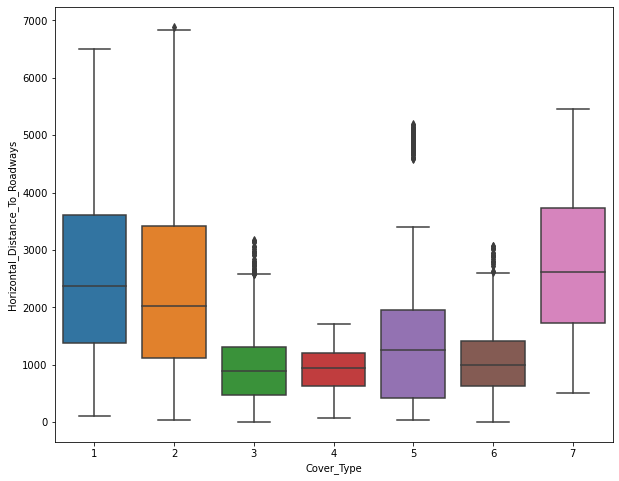

In [9]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data = train_data1);

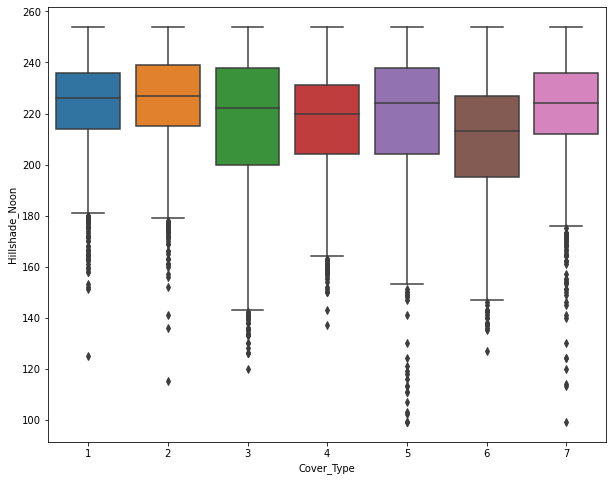

In [10]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='Cover_Type', y='Hillshade_Noon', data = train_data1);

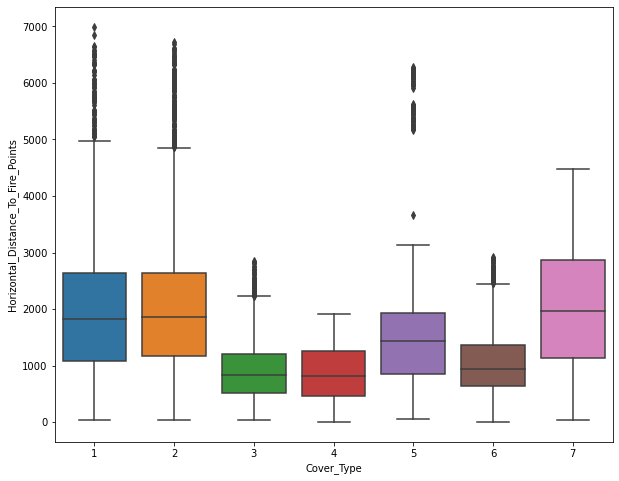

In [11]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data = train_data1);

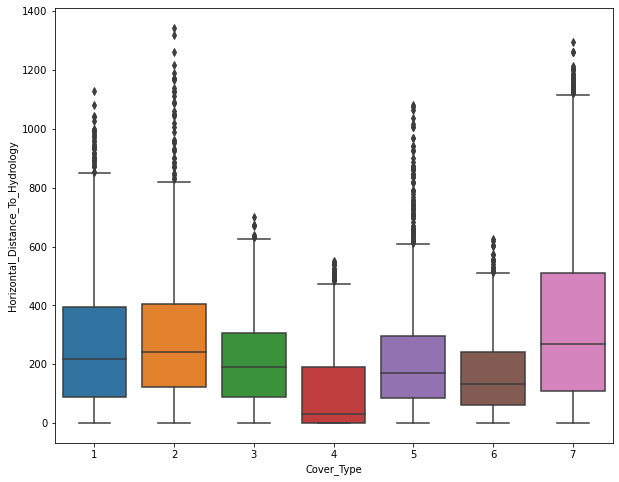

In [12]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data = train_data1);

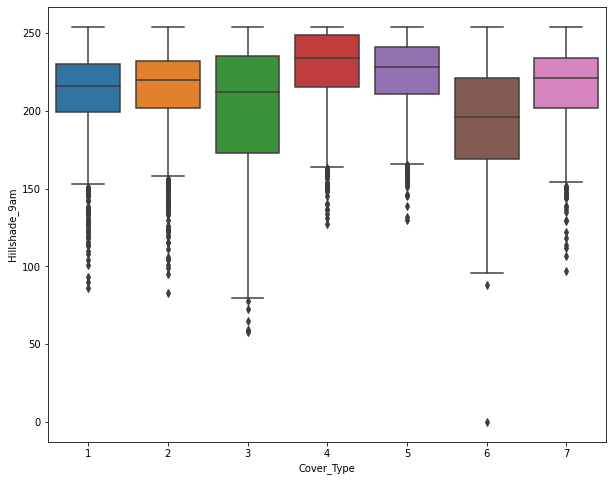

In [13]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='Cover_Type', y='Hillshade_9am', data = train_data1);

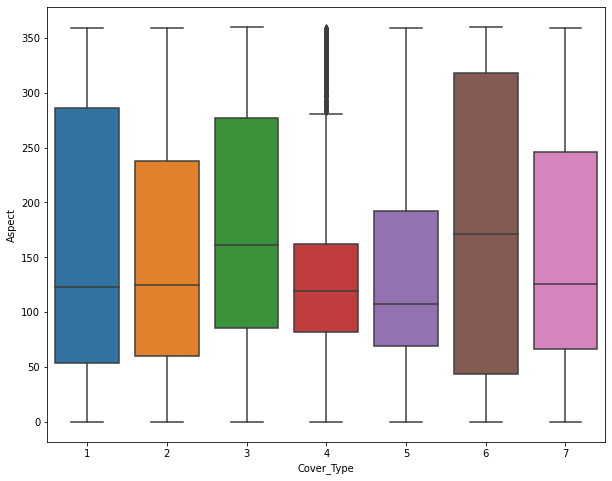

In [14]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='Cover_Type', y='Aspect', data = train_data1);

No significant outliers found

In [15]:
# Check for duplicates
train_data.drop_duplicates(subset=None, keep='first', inplace=True);

In [16]:
#Check missing values
train_data.isnull().sum()[train_data.isnull().sum()>0]

Series([], dtype: int64)

No missing values

## Feature Engineering 

In [17]:
# Columns with standard deviations = 0 (constant value)
train_data.columns[train_data.std() == 0]

Index(['Soil_Type7', 'Soil_Type15'], dtype='object')

In [18]:
test_data.columns[test_data.std() == 0]

Index([], dtype='object')

In [19]:
# Remove constant columns since they do not help make a prediction
train_data.drop(train_data.columns[train_data.std() == 0],axis=1,inplace=True)

In [233]:
# For test data
test_data.drop(['Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)

In [21]:
train_data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8', 'Soil_Type9',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type'],
     

#### Attribute combination

In [22]:
train_data_feng = train_data.copy() # dataframe with feature engineering

In [23]:
# Adding Elevation and Vertical distance to hydrology
train_data_feng['Elevated_Distance_To_Hydrology'] = train_data_feng['Elevation'] + train_data_feng['Vertical_Distance_To_Hydrology']
# Adding Horizontal distance  distance to Fire and Hydrology
train_data_feng['Distance_To_Fire_Hydrology'] = train_data_feng['Horizontal_Distance_To_Fire_Points'] + train_data_feng['Horizontal_Distance_To_Hydrology']
# Euclidian distance to hydrology
train_data_feng['Euclidian_Distance_To_Hydrology'] = (train_data_feng['Horizontal_Distance_To_Hydrology']**2 + train_data_feng['Vertical_Distance_To_Hydrology']**2)**0.5
# Adding Horizontal distance to Road and Hydrology
train_data_feng['Horizontal_Distance_To_Road_Hydrology'] = train_data_feng['Horizontal_Distance_To_Roadways'] + train_data_feng['Horizontal_Distance_To_Hydrology']
# Adding Horizontal distance to Road and Firepoints
train_data_feng['Horizontal_Distance_To_Road_Fire'] = train_data_feng['Horizontal_Distance_To_Roadways'] + train_data_feng['Horizontal_Distance_To_Fire_Points']
# Total hillshade -> sum of all hillshades
train_data_feng['Total_Hillshade'] = train_data_feng['Hillshade_9am'] + train_data_feng['Hillshade_Noon'] + train_data_feng['Hillshade_3pm']

In [234]:
# Feature combination for test data
test_data_feng = test_data.copy() # dataframe with feature engineering
# Adding Elevation and Vertical distance to hydrology
test_data_feng['Elevated_Distance_To_Hydrology'] = test_data_feng['Elevation'] + test_data_feng['Vertical_Distance_To_Hydrology']
# Adding Horizontal distance  distance to Fire and Hydrology
test_data_feng['Distance_To_Fire_Hydrology'] = test_data_feng['Horizontal_Distance_To_Fire_Points'] + test_data_feng['Horizontal_Distance_To_Hydrology']
# Euclidian distance to hydrology
test_data_feng['Euclidian_Distance_To_Hydrology'] = (test_data_feng['Horizontal_Distance_To_Hydrology']**2 + test_data_feng['Vertical_Distance_To_Hydrology']**2)**0.5
# Adding Horizontal distance to Road and Hydrology
test_data_feng['Horizontal_Distance_To_Road_Hydrology'] = test_data_feng['Horizontal_Distance_To_Roadways'] + test_data_feng['Horizontal_Distance_To_Hydrology']
# Adding Horizontal distance to Road and Firepoints
test_data_feng['Horizontal_Distance_To_Road_Fire'] = test_data_feng['Horizontal_Distance_To_Roadways'] + test_data_feng['Horizontal_Distance_To_Fire_Points']
# Total hillshade -> sum of all hillshades
test_data_feng['Total_Hillshade'] = test_data_feng['Hillshade_9am'] + test_data_feng['Hillshade_Noon'] + test_data_feng['Hillshade_3pm']

## Machine Learning modeling 

In [235]:
# Separating the features and target
X_train = train_data_feng.loc[:, train_data_feng.columns != 'Cover_Type']
y_train = train_data_feng['Cover_Type']
X_test = test_data_feng

### Random Forest

#### Grid Search (finding best parameter)

In [103]:
%%time 
# Random forest grid search for best parameters
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state = 0)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50, 100, 200, 300, 400, 500], 'max_features': ['auto', None, 'log2']}]
grid_search = GridSearchCV(estimator = RF_classifier, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           return_train_score=True)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.07 %
Best Parameters: {'max_features': 'log2', 'n_estimators': 300}
CPU times: user 6.4 s, sys: 412 ms, total: 6.81 s
Wall time: 6min 30s


In [104]:
%%time
## Redoing Grid search with Fine tuned  parameters
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_features = 'log2', random_state = 0)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [120, 140, 160, 180, 200, 220, 240, 260, 280]}]
grid_search = GridSearchCV(estimator = RF_classifier, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           return_train_score=True)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 73.08 %
Best Parameters: {'n_estimators': 280}
CPU times: user 5.31 s, sys: 48 ms, total: 5.36 s
Wall time: 54.4 s


In [26]:
# Fitting the data with the optimal parameters
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 280, max_features = 'log2', random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=280, random_state=0)

#### Evaluation

In [27]:
# Evaluating accuracy on the training set
RF_y_pred_train = RF_classifier.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, RF_y_pred_train, normalize=True)

1.0

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, RF_y_pred_train)
cm

array([[2160,    0,    0,    0,    0,    0,    0],
       [   0, 2160,    0,    0,    0,    0,    0],
       [   0,    0, 2160,    0,    0,    0,    0],
       [   0,    0,    0, 2160,    0,    0,    0],
       [   0,    0,    0,    0, 2160,    0,    0],
       [   0,    0,    0,    0,    0, 2160,    0],
       [   0,    0,    0,    0,    0,    0, 2160]])

Strong overfitting

#### Cross-validation

In [108]:
%%time
# Applying k-Fold Cross Validation
RF_classifier = RandomForestClassifier(n_estimators = 280, max_features = 'log2', random_state = 0)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF_classifier, X = X_train, y = y_train, cv = 10)

CPU times: user 45.3 s, sys: 128 ms, total: 45.4 s
Wall time: 45.4 s


In [120]:
print("Accuracy scores:", accuracies)
print("Accuracy mean:", accuracies.mean())
print("Accuracy standard deviation:", accuracies.std())

Accuracy scores: [0.50330688 0.71693122 0.74537037 0.68320106 0.75396825 0.71494709
 0.76917989 0.77843915 0.81547619 0.82738095]
Accuracy mean: 0.7308201058201058
Accuracy standard deviation: 0.08686307618043086


### Analysis & Inference

#### Feature Importance

In [29]:
RF_classifier.feature_importances_

array([5.42290228e-02, 1.41515921e-01, 3.23835883e-02, 2.26085324e-02,
       3.46522461e-02, 3.26320469e-02, 4.80656292e-02, 3.50188096e-02,
       2.63102410e-02, 2.89057567e-02, 3.93564092e-02, 1.31025045e-02,
       3.28270697e-03, 1.39667073e-02, 2.84125462e-02, 1.19651414e-03,
       4.31719549e-03, 1.42639466e-02, 9.08550411e-03, 9.38843376e-04,
       2.13948295e-03, 1.53789280e-06, 9.71062301e-05, 1.94294016e-02,
       2.26883361e-03, 2.65872412e-03, 4.50571230e-03, 4.41245281e-04,
       6.11591113e-04, 3.98849127e-03, 4.23828232e-04, 2.40238761e-04,
       1.10116029e-03, 1.56024103e-04, 4.16553990e-03, 4.21391698e-03,
       1.77356201e-03, 1.03638008e-05, 3.73362783e-04, 1.41014711e-04,
       8.26006940e-05, 4.72931735e-03, 6.46921586e-03, 1.98782602e-03,
       4.00337815e-03, 3.13838834e-03, 2.38411722e-04, 1.15531094e-03,
       4.65738865e-05, 2.25311382e-04, 1.19631964e-02, 1.21264222e-02,
       6.06184515e-03, 1.06688669e-01, 4.02310974e-02, 3.76840826e-02,
      

In [30]:
Feat_Imp = pd.DataFrame({'Features': X_train.columns, 'Importance Score': RF_classifier.feature_importances_})

In [31]:
FI_sorted = Feat_Imp.sort_values(by=['Importance Score'], ascending=False)

In [32]:
FI_sorted.head(15)

,Features,Importance Score
1,Elevation,0.141516
53,Elevated_Distance_To_Hydrology,0.106689
57,Horizontal_Distance_To_Road_Fire,0.054646
0,Id,0.054229
56,Horizontal_Distance_To_Road_Hydrology,0.049621
6,Horizontal_Distance_To_Roadways,0.048066
54,Distance_To_Fire_Hydrology,0.040231
10,Horizontal_Distance_To_Fire_Points,0.039356
55,Euclidian_Distance_To_Hydrology,0.037684
7,Hillshade_9am,0.035019


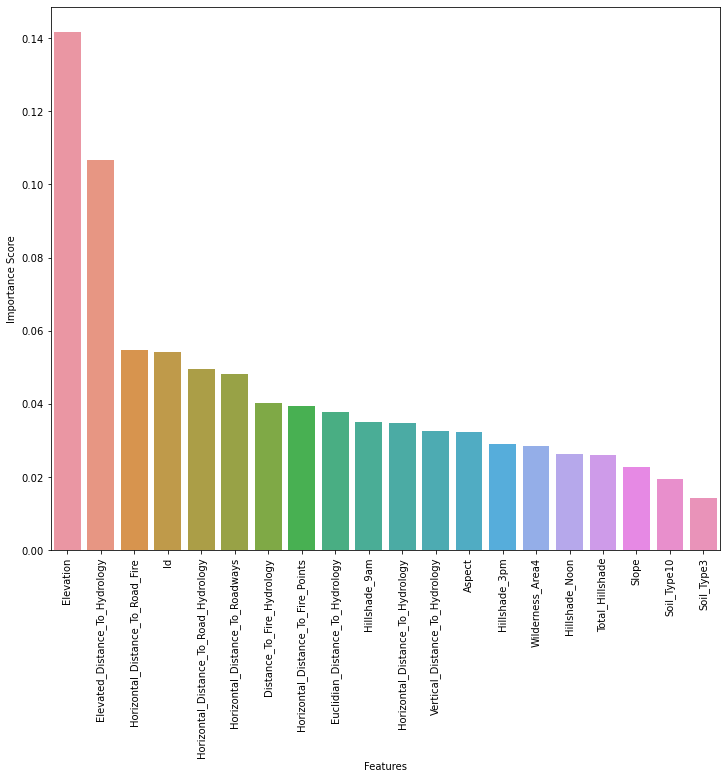

In [93]:
plt.subplots(figsize=(12, 10))
ax = sns.barplot(x='Features', y='Importance Score', data = FI_sorted.head(20))
ax.xaxis.set_tick_params(rotation=90)

Elevation is the most important feature for the forest type selection. Followed by elevated distance to hydrology (Elevation + Vertical distance to hydrology). Others are much lower in significance. Soil types seems to be least significant.

### Interpreting using Shapely values

Shapley values, coming from theory of cooperative games explains the marginal contribution of the feature to the prediction. 
A good explanation can be found here:
https://christophm.github.io/interpretable-ml-book/shapley.html

Using shap package from https://github.com/slundberg/shap

In [94]:
# Importing shap package (conda install -c conda-forge shap)
import shap
#shap.initjs()
# Create Tree Explainer object for calculating shap values
explainer = shap.TreeExplainer(RF_classifier)

Here we study the shapley value of an example sample corresponding to all category prediction.

In [136]:
# Sampling instances from each category of Cover_Type
n_samples = 1
sample_type1 = train_data_feng[train_data_feng['Cover_Type'] == 1].sample(n_samples)
sample_type2 = train_data_feng[train_data_feng['Cover_Type'] == 2].sample(n_samples)
sample_type3 = train_data_feng[train_data_feng['Cover_Type'] == 3].sample(n_samples)
sample_type4 = train_data_feng[train_data_feng['Cover_Type'] == 4].sample(n_samples)
sample_type5 = train_data_feng[train_data_feng['Cover_Type'] == 5].sample(n_samples)
sample_type6 = train_data_feng[train_data_feng['Cover_Type'] == 6].sample(n_samples)
sample_type7 = train_data_feng[train_data_feng['Cover_Type'] == 7].sample(n_samples)

In [137]:
sample_type1.drop(['Cover_Type'], axis=1, inplace = True)
sample_type2.drop(['Cover_Type'], axis=1, inplace = True)
sample_type3.drop(['Cover_Type'], axis=1, inplace = True)
sample_type4.drop(['Cover_Type'], axis=1, inplace = True)
sample_type5.drop(['Cover_Type'], axis=1, inplace = True)
sample_type6.drop(['Cover_Type'], axis=1, inplace = True)
sample_type7.drop(['Cover_Type'], axis=1, inplace = True)

#### Visualizing SHAP values for different predictions

The plots display how much each feature push the prediction from the base value 0.1427 (mean of all prediction - 1/7).
Blue indicate pushing to lower value and red pushing towards higher value. The size of the blocks indicate the impact.

In [128]:
shap_values1 = explainer.shap_values(sample_type1)
#shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values1[1], sample_type1)

In [132]:
shap_values2 = explainer.shap_values(sample_type2)
#shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values2[1], sample_type2)

In [133]:
shap_values3 = explainer.shap_values(sample_type3)
#shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values3[1], sample_type3)

In [138]:
shap_values4 = explainer.shap_values(sample_type4)
#shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values4[1], sample_type4)

In [139]:
shap_values5 = explainer.shap_values(sample_type5)
#shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values5[1], sample_type5)

In [140]:
shap_values6 = explainer.shap_values(sample_type6)
#shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values6[1], sample_type6)

In [141]:
shap_values7 = explainer.shap_values(sample_type7)
#shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values7[1], sample_type7)

#### Summary of shapley value contributions 

Here we study shapley value contributions of features for a sample of many instances.

In [167]:
%%time
sample = X_train.sample(200)
shap_values = explainer.shap_values(sample)

CPU times: user 2min 51s, sys: 544 ms, total: 2min 52s
Wall time: 2min 51s


Summary of shap value contributions

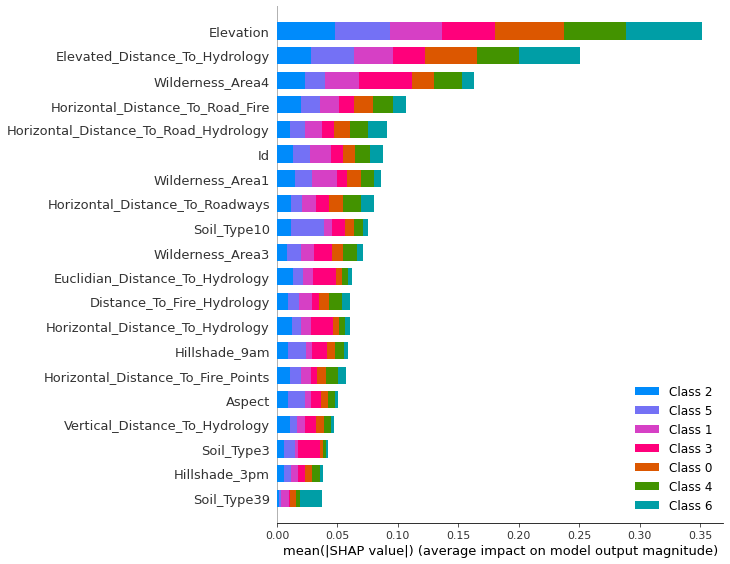

In [168]:
shap.summary_plot(shap_values,sample)

Elevation has the biggest imact in classification. Little more impactful for Cover type 1 and 7. <br>
Elevation + Distance to Hydrology has the second biggest impact.  Wilderness area 4 also has strong impact. 

In [165]:
shap.force_plot(explainer.expected_value[0], np.array(shap_values)[0], sample)

#### Shapley value effects of a specific feature

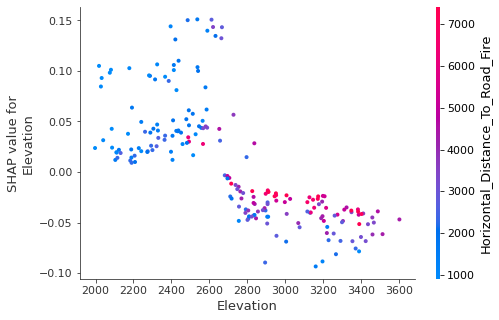

In [221]:
shap.dependence_plot("Elevation", np.array(shap_values)[2], sample)

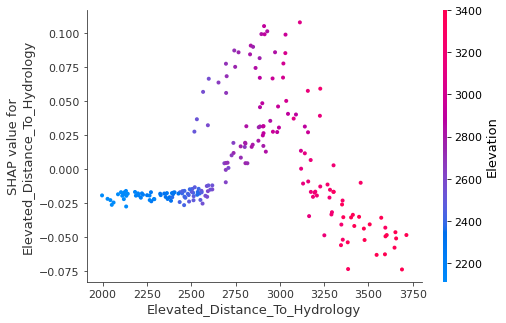

In [215]:
shap.dependence_plot("Elevated_Distance_To_Hydrology", np.array(shap_values)[1], sample)

In [225]:
X_test.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [226]:
X_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8', 'Soil_Type9',
       'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13',
       'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Elevated_Distance_T

### Prediction of Testset

In [237]:
y_pred_RF_test = RF_classifier.predict(X_test)
output_RF = pd.DataFrame({'Id': test_data.Id, 'Cover_Type': y_pred_RF_test})

In [238]:
output_RF.to_csv('./Submissions/submission_RF.csv', index=False)

Kaggle Score = 0.76142